# Qubit connectivity and accuracy of ansatz

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("../data/mps/sto-6g/n2_connectivity.csv", skiprows=1, delimiter=',')
R, E_heavyhex, E_hex, E_square, E_alltoall = (
    data[:, 0],
    data[:, 1],
    data[:, 2],
    data[:, 3],
    data[:, 4],
)

data2 = np.loadtxt("../data/classical/n2_sto-6g.csv", skiprows=1, delimiter=',')
R2, E_FCI_all = data2[:, 0][0:-6], data2[:, 1][0:-6]


E_FCI = E_FCI_all
err_heavyhex = np.abs(E_heavyhex - E_FCI)
err_hex = np.abs(E_hex - E_FCI)
err_square = np.abs(E_square - E_FCI)
err_alltoall = np.abs(E_alltoall - E_FCI)

ks_12 = np.loadtxt("../data/classical/n2_ks.csv", skiprows=1, delimiter=',')
k_12 = ks_12[:, 0].astype(int)          # n_reps
E_hh_12 = ks_12[:, 1]
E_hex_12 = ks_12[:, 2]
E_sq_12 = ks_12[:, 3]
E_all_12 = ks_12[:, 4]

ks_21 = np.loadtxt("../data/classical/n2_ks_dissociation.csv", skiprows=1, delimiter=',')
k_21 = ks_21[:, 0].astype(int)
E_hh_21 = ks_21[:, 1]
E_hex_21 = ks_21[:, 2]
E_sq_21 = ks_21[:, 3]
E_all_21 = ks_21[:, 4]

def fci_at(R_target, R_list, E_list):
    idx = np.argmin(np.abs(R_list - R_target))
    return E_list[idx]

E_FCI_12 = fci_at(1.2, R2, E_FCI_all)
E_FCI_21 = fci_at(2.1, R2, E_FCI_all)

err_hh_12   = np.abs(E_hh_12   - E_FCI_12)
err_hex_12  = np.abs(E_hex_12  - E_FCI_12)
err_sq_12   = np.abs(E_sq_12   - E_FCI_12)
err_all_12  = np.abs(E_all_12  - E_FCI_12)

err_hh_21   = np.abs(E_hh_21   - E_FCI_21)
err_hex_21  = np.abs(E_hex_21  - E_FCI_21)
err_sq_21   = np.abs(E_sq_21   - E_FCI_21)
err_all_21  = np.abs(E_all_21  - E_FCI_21)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax1, ax2 = axs  
ax1.plot(R2, E_FCI, label="FCI", c='k')
ax1.plot(R, E_heavyhex, label="Heavy-hex")
ax1.plot(R, E_hex, label="Hex")
ax1.plot(R, E_square, label="Square")
ax1.plot(R, E_alltoall, label="All-to-all")
ax1.set_ylabel("Energy [Ha]")
ax1.legend()

# --- top-right: abs error vs R ---
ax2.semilogy(R, err_heavyhex, label="Heavy-hex")
ax2.semilogy(R, err_hex, label="Hex")
ax2.semilogy(R, err_square, label="Square")
ax2.semilogy(R, err_alltoall, label="All-to-all")
ax2.set_xlabel("R [Å]")
ax2.set_ylabel("Absolute error [Ha]")
ax2.legend()



ValueError: operands could not be broadcast together with shapes (27,) (11,) 

# Qubit connectivity: Equilibrium ground state energy accuracy vs. ansatz layers $k$

NameError: name 'k_12' is not defined

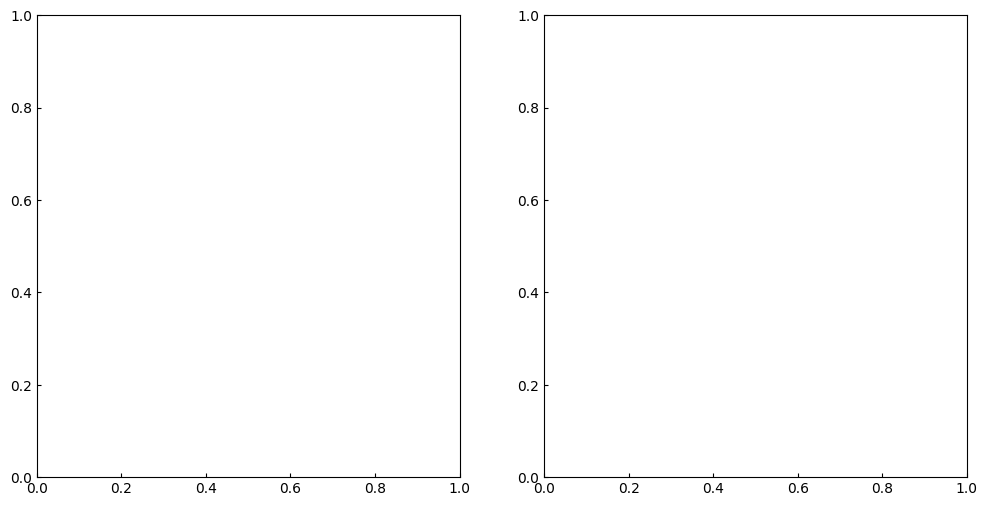

In [4]:
import tikzplotlib
plt.rcParams.update({"lines.markersize":3,
                     "xtick.major.size":3,
                     "xtick.minor.size":3,
                     "ytick.major.size":3,
                     "ytick.minor.size":3,
                     "xtick.direction":"in",
                     "ytick.direction":"in"})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax3, ax4 = axs   # top row
# equilibrium
ax3.semilogy(k_12, err_hh_12,"-s", label="Heavy-hex")
ax3.semilogy(k_12, err_hex_12,"-s", label="Hex")
ax3.semilogy(k_12, err_sq_12,"-s", label="Square")
ax3.semilogy(k_12, err_all_12,"-s", label="All-to-all")
ax3.set_xlabel(r"$k$")
ax3.set_ylabel(r"$|E_{\text{FCI}} - E_{ansatz}|$ [Ha]")
ax3.set_ylim([1e-2,5e-1])
ax3.legend(ncol=2, framealpha=0.0, loc="upper left")
ax3.set_title(r"Equilibrium region ($R = 1.1 $ Å)")

# dissociation
ax4.semilogy(k_21, err_hh_21,"-s", label="Heavy-hex")
ax4.semilogy(k_21, err_hex_21,"-s", label="Hex")
ax4.semilogy(k_21, err_sq_21,"-s", label="Square")
ax4.semilogy(k_21, err_all_21,"-s", label="All-to-all")
ax4.set_xlabel(r"$k$")
ax4.set_ylabel(r"$|E_{\text{FCI}} - E_{ansatz}|$ [Ha]")
ax4.set_ylim([1e-1,2])
ax4.set_title(r"Dissociation region ($R = 2.1 $ Å)")
ax4.legend(ncol=2, framealpha=0.0)

plt.tight_layout()
tikzplotlib.save( "figures/qubit_connectivity.tex", textsize=6, extra_axis_parameters=[ "tick label style={font=\\scriptsize}", "label style={font=\\footnotesize}", "title style={font=\\footnotesize}", "legend style={font=\\scriptsize}", ], extra_groupstyle_parameters=[ "horizontal sep=1.75cm" ] )
